In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('sourse1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sourse1/readme.md
sourse1/images/maksssksksss702.png
sourse1/images/maksssksksss716.png
sourse1/images/maksssksksss299.png
sourse1/images/maksssksksss266.png
sourse1/images/maksssksksss500.png
sourse1/images/maksssksksss514.png
sourse1/images/maksssksksss272.png
sourse1/images/maksssksksss528.png
sourse1/images/maksssksksss312.png
sourse1/images/maksssksksss474.png
sourse1/images/maksssksksss460.png
sourse1/images/maksssksksss306.png
sourse1/images/maksssksksss448.png
sourse1/images/maksssksksss34.png
sourse1/images/maksssksksss20.png
sourse1/images/maksssksksss851.png
sourse1/images/maksssksksss689.png
sourse1/images/maksssksksss845.png
sourse1/images/maksssksksss676.png
sourse1/images/maksssksksss110.png
sourse1/images/maksssksksss104.png
sourse1/images/maksssksksss662.png
sourse1/images/maksssksksss138.png
sourse1/images/maksssksksss139.png
sourse1/images/maksssksksss105.png
sourse1/images/maksssksksss663.png
sourse1/images/maksssksksss677.png
sourse1/images/maksssksksss111.png
sour

In [3]:
os.mkdir("./train_data")
os.mkdir("./train_data/images")
os.mkdir("./train_data/labels")
os.mkdir("./train_data/images/train")
os.mkdir("./train_data/images/val")
os.mkdir("./train_data/labels/train")
os.mkdir("./train_data/labels/val")

In [4]:
import xml.etree.ElementTree as ET
from xml.dom.minidom import parse



path = "sourse1/annotations"
classes = {"with_mask":0,"without_mask":1,"mask_weared_incorrect":2}

for annotations in os.listdir(path):
    
    
    dom = parse(os.path.join(path,annotations))
    root = dom.documentElement
    filename = ".txt".join(root.getElementsByTagName("filename")[0].childNodes[0].data.split(".png"))
    
    image_width = root.getElementsByTagName("width")[0].childNodes[0].data
    image_height = root.getElementsByTagName("height")[0].childNodes[0].data
    with open("./train_data/labels/train/"+filename,"w") as r:
        
        for items in root.getElementsByTagName("object") :
            
            name = items.getElementsByTagName("name")[0].childNodes[0].data
            xmin = items.getElementsByTagName("xmin")[0].childNodes[0].data
            ymin = items.getElementsByTagName("ymin")[0].childNodes[0].data
            xmax = items.getElementsByTagName("xmax")[0].childNodes[0].data
            ymax = items.getElementsByTagName("ymax")[0].childNodes[0].data
            x_center_norm = ((int(xmin)+int(xmax)) / 2 ) / int(image_width)
            y_center_norm = ((int(ymin)+int(ymax))/2) / int(image_height)
            width_norm = ((int(xmax)-int(xmin))/int(image_width))
            height_norm = ((int(ymax)-int(ymin))/int(image_height))
            
            r.write(str(classes[name]))
            r.write(" ")
            r.write(str(x_center_norm))
            r.write(" ")
            r.write(str(y_center_norm))
            r.write(" ")
            r.write(str(width_norm))
            r.write(" ")
            r.write(str(height_norm))
            r.write("\n")
            

In [5]:
len(os.listdir("./train_data/labels/train/")) == len(os.listdir("sourse1/images"))

True

In [6]:
import shutil
path = "sourse1/images"
for images in os.listdir(path):
    image_path = os.path.join(path,images)
    shutil.copy(image_path,"./train_data/images/train/"+images)

In [7]:
len(os.listdir("./train_data/images/train/")) == len(os.listdir("./train_data/labels/train/"))

True

In [8]:
from random import shuffle
from glob import glob
import random
import shutil

random.seed(42)
files = glob("./train_data/images/train/*.png")
shuffle(files)
txt_train_path = "./train_data/labels/train/"
img_train_path = "./train_data/images/train/"
txt_val_path = "./train_data/labels/val/"
img_val_path = "./train_data/images/val/"
for i in files[:120]:
    
    filename = i.split("/")[-1]
    shutil.move(txt_train_path+filename.replace(".png",".txt"),txt_val_path+filename.replace(".png",".txt"))
    shutil.move(img_train_path+filename,img_val_path+filename)

In [9]:
len(os.listdir("./train_data/labels/val/")) == len(os.listdir("./train_data/images/val/"))

True

In [10]:
with open("data.yaml","w") as f:
    f.write("train: ")
    f.write("train_data/images/train/")
    f.write("\n")
    f.write("val: ")
    f.write("train_data/images/val/")
    f.write("\n")
    f.write("nc: ")
    f.write(" 3")
    f.write("\n")
    f.write("names: ")
    f.write(" ['with_mask','without_mask','mask_weared_incorrect']")

# YoloV5

In [11]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 8765, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8765 (delta 6), reused 9 (delta 6), pack-reused 8754
Receiving objects: 100% (8765/8765), 9.33 MiB | 4.40 MiB/s, done.
Resolving deltas: 100% (6093/6093), done.


In [12]:
%cd yolov5

/Users/huangyi/Documents/USF_summer21/dl/final_project/data/yolov5


In [13]:
!pip install -r requirements.txt

     |████████████████████████████████| 285 kB 2.3 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [14]:
!pip uninstall -q -y wandb 

# Detect

In [15]:
!wget https://www.ed.ac.uk/files/styles/landscape_breakpoints_theme_uoe_mobile_1x/public/thumbnails/image/gettyimages-1215069129_jacoblund.png

--2021-08-11 02:36:17--  https://www.ed.ac.uk/files/styles/landscape_breakpoints_theme_uoe_mobile_1x/public/thumbnails/image/gettyimages-1215069129_jacoblund.png
Resolving www.ed.ac.uk (www.ed.ac.uk)... 129.215.228.101
Connecting to www.ed.ac.uk (www.ed.ac.uk)|129.215.228.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628123 (613K) [image/png]
Saving to: ‘gettyimages-1215069129_jacoblund.png’

gettyimages-1215069 100%[===================>] 613.40K   219KB/s    in 2.8s    

2021-08-11 02:36:22 (219 KB/s) - ‘gettyimages-1215069129_jacoblund.png’ saved [628123/628123]



In [17]:
!python detect.py --source "gettyimages-1215069129_jacoblund.png" --weights 'best.pt'

detect: weights=['best.pt'], source=gettyimages-1215069129_jacoblund.png, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-351-ge96c74b torch 1.9.0 CPU

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /Users/huangyi/Documents/USF_summer21/dl/final_project/data/yolov5/gettyimages-1215069129_jacoblund.png: 448x640 4 with_masks, 3 without_masks, Done. (0.452s)
Results saved to runs/detect/exp2
Done. (0.577s)


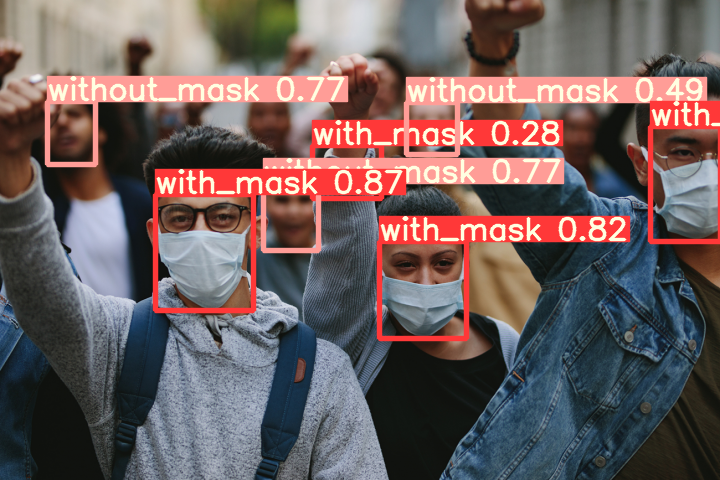

In [21]:
from IPython.display import Image
Image("runs/detect/exp2/gettyimages-1215069129_jacoblund.png")

In [24]:
!python detect.py --source 0 --weights 'best.pt'

detect: weights=['best.pt'], source=0, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-351-ge96c74b torch 1.9.0 CPU

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
1/1: 0...  success (inf frames 1280x720 at 30.00 FPS)

0: 384x640 Done. (0.255s)
0: 384x640 1 without_mask, Done. (0.242s)
0: 384x640 1 without_mask, Done. (0.216s)
0: 384x640 1 without_mask, Done. (0.222s)
0: 384x640 1 without_mask, Done. (0.225s)
0: 384x640 1 without_mask, Done. (0.201s)
0: 384x640 1 without_mask, Done. (0.207s)
0: 384x640 1 without_mask, Done. (0.204s)
0: 384x640 1 without_mask, Done. (0.224s)
0: 384x640 1 without_mask, Done. (0.222s)
0: 384x640 1 without_mask, Do

0: 384x640 1 without_mask, Done. (0.201s)
0: 384x640 1 without_mask, Done. (0.200s)
0: 384x640 1 without_mask, Done. (0.224s)
0: 384x640 1 without_mask, Done. (0.209s)
0: 384x640 1 without_mask, Done. (0.208s)
0: 384x640 1 without_mask, Done. (0.196s)
0: 384x640 1 without_mask, Done. (0.200s)
0: 384x640 1 without_mask, Done. (0.203s)
0: 384x640 1 without_mask, Done. (0.197s)
0: 384x640 1 without_mask, Done. (0.192s)
0: 384x640 1 without_mask, Done. (0.216s)
0: 384x640 1 without_mask, Done. (0.214s)
0: 384x640 1 without_mask, Done. (0.231s)
0: 384x640 1 without_mask, Done. (0.288s)
0: 384x640 1 without_mask, Done. (0.313s)
0: 384x640 1 without_mask, Done. (0.209s)
0: 384x640 1 without_mask, Done. (0.236s)
0: 384x640 1 without_mask, Done. (0.215s)
0: 384x640 1 without_mask, Done. (0.207s)
0: 384x640 1 without_mask, Done. (0.222s)
0: 384x640 1 without_mask, Done. (0.204s)
0: 384x640 1 without_mask, Done. (0.196s)
0: 384x640 1 without_mask, Done. (0.241s)
0: 384x640 1 without_mask, Done. (

0: 384x640 1 without_mask, Done. (0.194s)
0: 384x640 1 without_mask, Done. (0.200s)
0: 384x640 1 without_mask, Done. (0.197s)
0: 384x640 1 without_mask, Done. (0.196s)
0: 384x640 1 without_mask, Done. (0.199s)
0: 384x640 1 without_mask, Done. (0.204s)
0: 384x640 1 without_mask, Done. (0.191s)
0: 384x640 1 without_mask, Done. (0.198s)
0: 384x640 1 without_mask, Done. (0.235s)
0: 384x640 1 without_mask, Done. (0.227s)
0: 384x640 1 without_mask, Done. (0.222s)
0: 384x640 1 without_mask, Done. (0.207s)
0: 384x640 1 without_mask, Done. (0.192s)
0: 384x640 1 without_mask, Done. (0.206s)
0: 384x640 1 without_mask, Done. (0.206s)
0: 384x640 1 without_mask, Done. (0.327s)
0: 384x640 1 without_mask, Done. (0.260s)
0: 384x640 1 without_mask, Done. (0.299s)
0: 384x640 1 without_mask, Done. (0.262s)
0: 384x640 1 without_mask, Done. (0.221s)
0: 384x640 1 without_mask, Done. (0.239s)
0: 384x640 1 without_mask, Done. (0.216s)
0: 384x640 1 with_mask, Done. (0.274s)
0: 384x640 1 with_mask, Done. (0.207s